<a href="https://colab.research.google.com/github/SinothileB/Project-2--part1/blob/main/Project2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the approved dataset you proposed for Project 2 - Part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

## Stroke Prediction Dataset

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
path= "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv"
df=pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Deleted unnecessary columns.

In [56]:
#Drop Id , as its a unique column that won't help with any thing
df  = df.drop(columns='id')

Deleted duplicate rows.

In [57]:
df.duplicated().sum()

0

Identified and addressed missing values.

In [58]:
df.isna().sum().sum()

201

Handle missings in the categorical

In [59]:
cat_o = df.select_dtypes("object").columns
cat_o


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [60]:
df[cat_o] = df[cat_o].fillna("MISSING")

In [61]:
#Check again
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [62]:
cat_n = df.select_dtypes("number").columns
# use the list of num columns to fill null values with -1
df[cat_n] = df[cat_n].fillna(-1)

In [63]:
#Check again
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [64]:
#Find and fix any inconsistent categories of data
# loop through the list of string columns
for col in cat_o:

  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())

  # Print an empty line for readability
  print('\n')

Value Counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Identified outliers.

In [66]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,27.717397,0.048728
std,22.612647,0.296607,0.226063,45.283560,9.645369,0.215320
min,0.080000,0.000000,0.000000,55.120000,-1.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



##Produced univariate visuals for the target and all features.

Target column is Stroke - I visualised it at the end

###Univariate for
Gender

Text(0.5, 1.0, 'Female vs. Males,vs Other.')

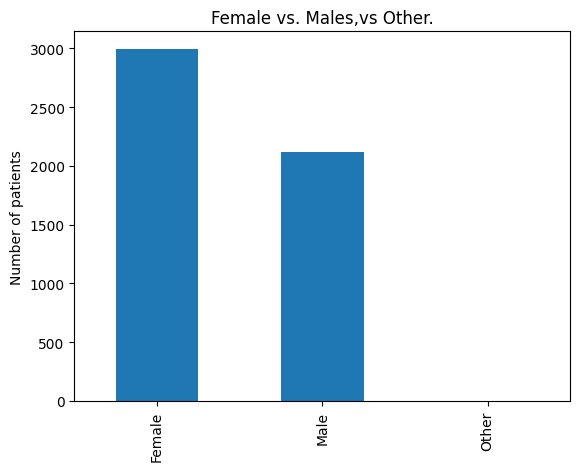

In [67]:
#1) Plot the counts for the number of patients per Gender
value_counts = df["gender"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title("Female vs. Males,vs Other.")

Gender that appears most here is females

Univariate :

Visuals for Age

Text(0.5, 1.0, 'age')

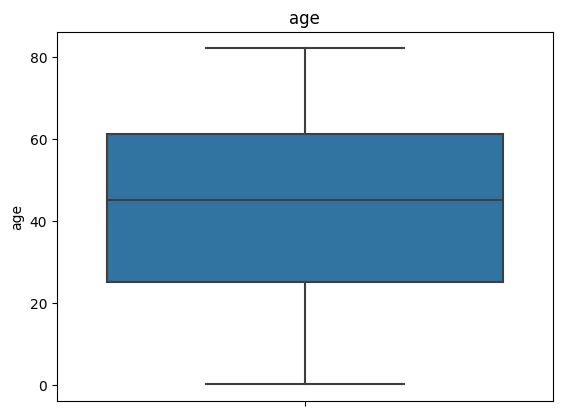

In [68]:
#Age
# Create a boxplot of Age of a patient
ax=sns.boxplot(data =df, y='age')
ax.set_title("age")


no outliers

Text(0.5, 1.0, 'Distribution of Age')

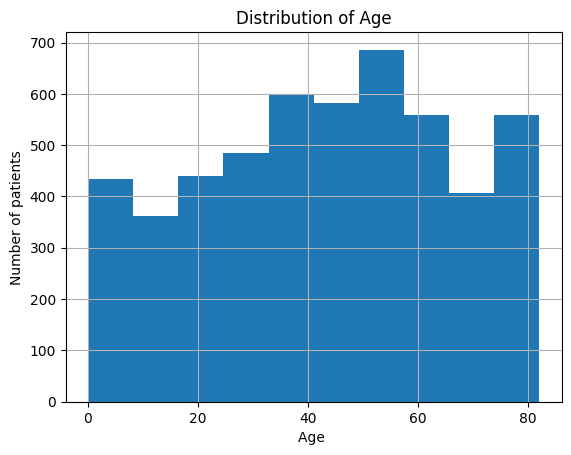

In [69]:
#Histogram
#2) Plot a histogram of the distribution of Age.
ax = df["age"].hist()
ax.set_xlabel("Age ")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of Age")

Age between 50 and 57 Occurs most in this data set

##Univariate for
hypertension

Text(0.5, 1.0, 'Distribution of hypertension')

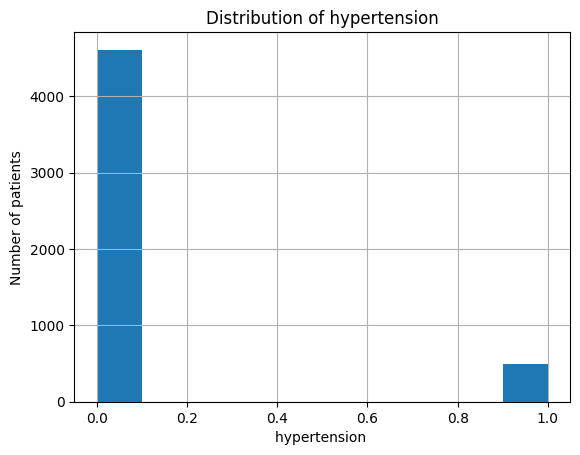

In [70]:
#Histogram
#2) Plot a histogram of the distribution of hypertension.
ax = df["hypertension"].hist()
ax.set_xlabel("hypertension ")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of hypertension")

Most patients do not suffer from hypertension(0 means no hypertension , 1 means suffers hypertension)

Heart disease

Text(0.5, 1.0, 'Distribution of heart disease')

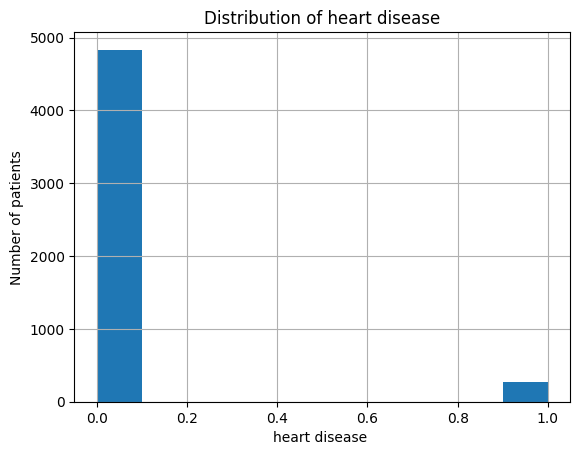

In [71]:
#Histogram
#2) Plot a histogram of the distribution of heart_disease.
ax = df["heart_disease"].hist()
ax.set_xlabel("heart disease ")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of heart disease")

Most patients do not suffer from heart disease(0 means no heart disease , 1 means suffers heart disease

###ever_married

Text(0.5, 1.0, 'Ever married status')

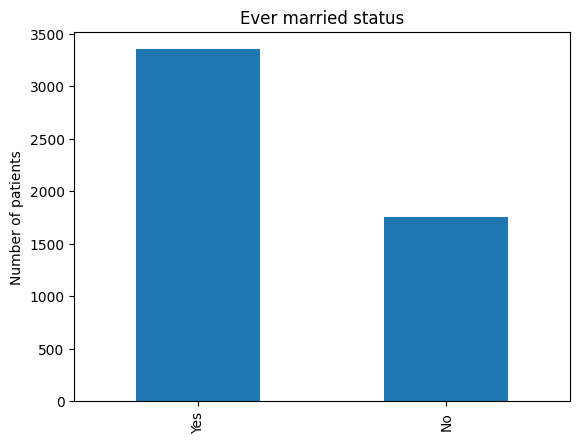

In [72]:
#Plot the counts for the number of patients per Marital status
value_counts = df["ever_married"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title("Ever married status")

Most patients have been married

##Work Type

Text(0.5, 1.0, ' Distribution of Work type')

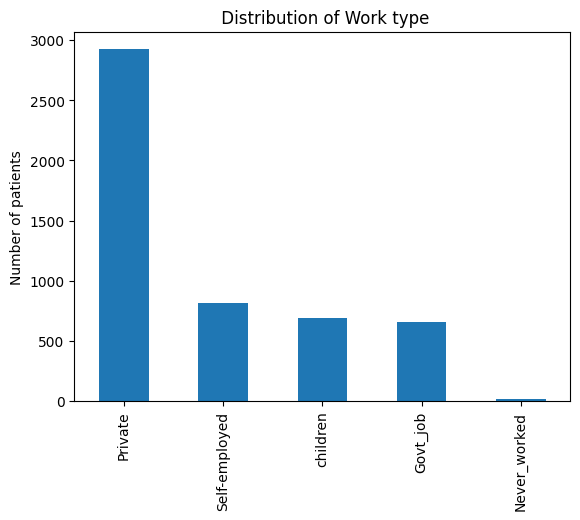

In [73]:
#Plot the counts for the number of patients per work_type
value_counts = df["work_type"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title(" Distribution of Work type")

Most Patients are Privately employed

Least Patients never worked

###Residence_type

Text(0.5, 1.0, ' Distribution of residence_type ')

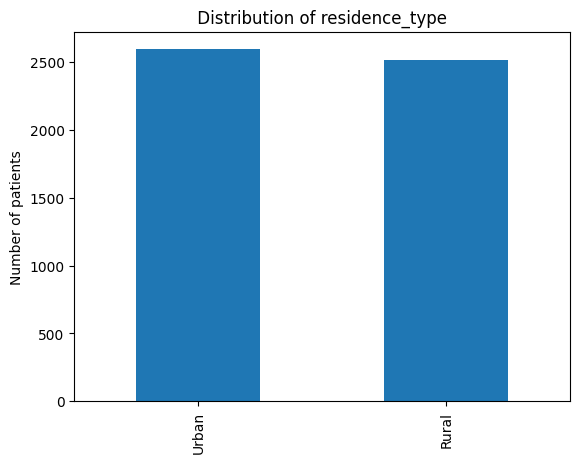

In [74]:
#Plot the counts for the number of patients per residence_type
value_counts = df["Residence_type"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title(" Distribution of residence_type ")

More patients are from Urban area

###avg_glucose_level

Text(0.5, 1.0, 'average glucose_level')

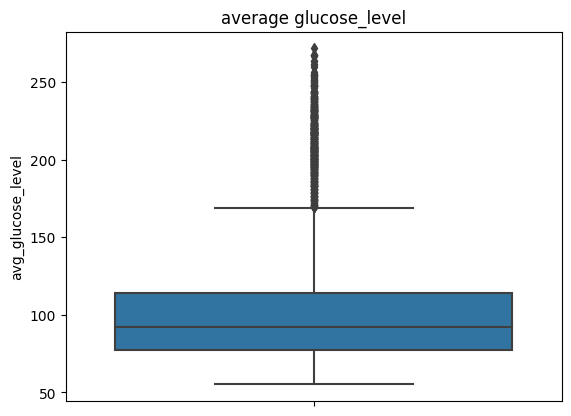

In [75]:
# Create a boxplot of avg_glucose_level of a patient
ax=sns.boxplot(data =df, y='avg_glucose_level')
ax.set_title("average glucose_level")


Looks like there are some outliers

Text(0.5, 1.0, 'Distribution of average glucose_level')

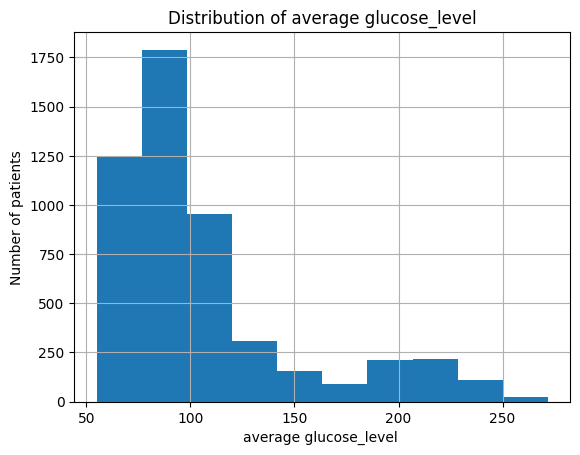

In [76]:
#Histogram
#2) Plot a histogram of the distribution of avg_glucose_level.
ax = df["avg_glucose_level"].hist()
ax.set_xlabel("average glucose_level ")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of average glucose_level")

Average of 50 to 100 appeared most

###BMI

Text(0.5, 1.0, 'bmi')

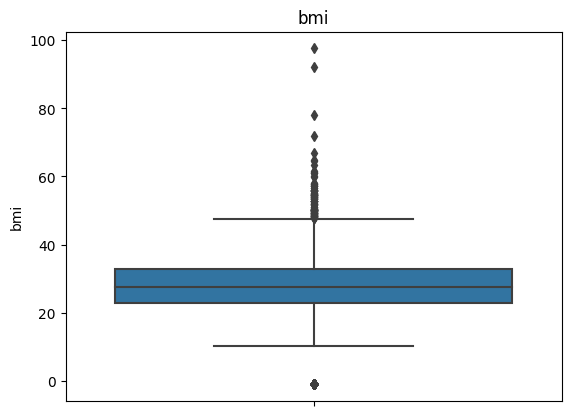

In [77]:
# Create a boxplot of BMI of a patient
ax=sns.boxplot(data =df, y='bmi')
ax.set_title("bmi")

Bmi has some outliers

###Smoking Status

Text(0.5, 1.0, ' Distribution of smoking_status ')

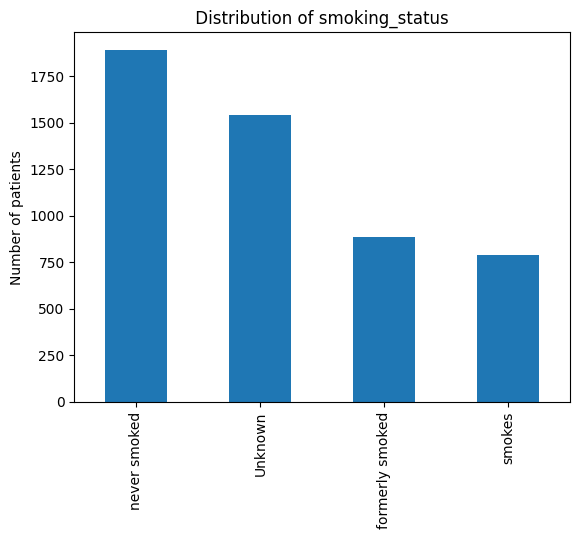

In [78]:
#Plot the counts for the number of patients per smoking_status
value_counts = df["smoking_status"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title(" Distribution of smoking_status ")

Data has more patience that have never smoked

###Stroke

Text(0.5, 1.0, 'Distribution of stroke')

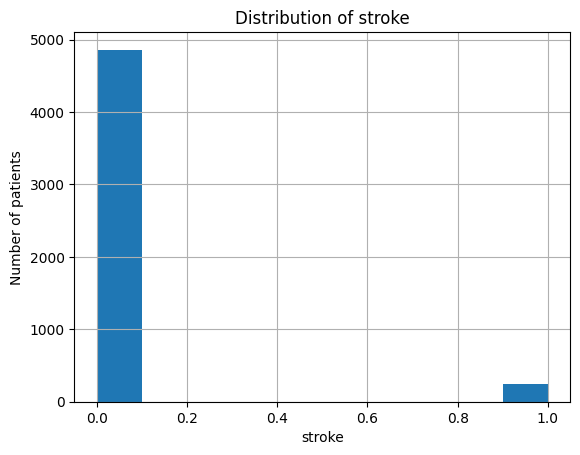

In [79]:
#Histogram
#2) Plot a histogram of the distribution of stroke.
ax = df["stroke"].hist()
ax.set_xlabel("stroke")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of stroke")

More patients have not suffered from the stroke(0 means have not suffered, 1 means have suffered the stroke)